# Distance Matrix for Vector Space Models #

In [1]:
import os
import glob
import re
import numpy as np
from natsort import natsorted
from sklearn.feature_extraction.text import CountVectorizer
from scipy import spatial
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
class VanillaText(object):
    def __init__(self, name, fpath):
        self.name = name
        self.path = fpath

    def files(self):
        self.fnames = natsorted(glob.glob(os.path.join(self.path,"*.txt")))
        return self.fnames

    def content(self):
        self.content = []
        for fname in self.files():
            with open(os.path.join(fname),'r') as f:
                self.content.append(f.read())
        return self.content

    def lignes(self):
        self.lignes = []
        for fname in self.files():
            with open(os.path.join(fname),'r') as f:
                self.lignes.append(f.readlines())
        return self.lignes


def clearstr(text):
    nachars = [r"\。",r"\@",r"\#",r"\d", r"\□", r"\？", r"\！"]
    for nachar in nachars:
        text = re.sub(nachar,"",text)
    return text


def tokenizer(s):
    return s.split(s)


def slicer(input, n = 100, cut_off = False):
    """
    slice text in slices of n chars/tokens
    - end cut off for full length normalization
    """
    slices = []
    for i in range(0,len(input),n):
        slices.append(input[i:(i+n)])
    if cut_off:
        del slices[-1]
    return slices


flatten = lambda l: [item for sublist in l for item in sublist]


def getidxs(l,val):
    return [i for i, x in enumerate(l) if x==val]

In [3]:
mpl.rcParams.update({"text.usetex": False,
                    "font.serif": "cmr10",
                    "mathtext.fontset": "cm",
                    "axes.unicode_minus": False
                    })

In [4]:
data_dir = os.path.join("..","dat", "slingerland_corpus")# directory containing your data set
corpus = VanillaText('ctext_full',data_dir)
texts = [clearstr(text) for text in corpus.content()]
fnames = [os.path.basename(fname).split(".")[0] for fname in corpus.files()]

with open(os.path.join("..", "res", "stopwords_chn_expert.txt") ,'r') as f:
    stopwords = f.read().replace(u'\ufeff','').split()

In [5]:
n_features = 1000
tf_vectorizer = CountVectorizer(analyzer = "word", min_df=2,\
    max_features=n_features,token_pattern = u'(?u)\\b\\w+\\b',stop_words = stopwords)
vec_mdl = tf_vectorizer.fit_transform(texts).todense()
feature_names = tf_vectorizer.get_feature_names()

$$\mathbf{a}\cdot\mathbf{b}=\left\|\mathbf{a}\right\|\left\|\mathbf{b}\right\|\cos\theta$$

 Given two vectors of attributes, A and B, the cosine similarity, cos(θ), is represented using a dot product and magnitude as

$$\text{similarity} = \cos(\theta) = {A \cdot B \over \|A\| \|B\|} = \frac{ \sum\limits_{i=1}^{n}{A_i \times B_i} }{ \sqrt{\sum\limits_{i=1}^{n}{(A_i)^2}} \times \sqrt{\sum\limits_{i=1}^{n}{(B_i)^2}} }$$

The resulting similarity ranges from −1 meaning exactly opposite, to 1 meaning exactly the same, with 0 usually indicating independence, and in-between values indicating intermediate similarity or dissimilarity.

For text matching, the attribute vectors A and B are usually the term frequency vectors of the documents. The cosine similarity can be seen as a method of normalizing document length during comparison.

In the case of information retrieval, the cosine similarity of two documents will range from 0 to 1, since the term frequencies (tf-idf weights) cannot be negative. The angle between two term frequency vectors cannot be greater than 90°.

If the attribute vectors are normalized by subtracting the vector means (e.g., $A - \bar{A}$), the measure is called centered cosine similarity and is equivalent to thePearson Correlation Coefficient.

In [25]:
m = vec_mdl.shape[0]
n = m
dX = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        dX[i,j] = 1 - spatial.distance.cosine(vec_mdl[i], vec_mdl[j])

In [26]:
dX_gauss = gaussian_filter(dX, sigma=1.5)
np.fill_diagonal(dX_gauss, 1.)  # add identity line
fig = plt.figure()
ax = fig.add_subplot(111)
#cax = ax.imshow(dX_gauss, cmap="hot")
cax = ax.imshow(dX, cmap="hot")
fname = os.path.join("..", "fig", "dist_mat.png")
fig.colorbar(cax)
ax.set_xlabel('$Document-Index$')
ax.set_ylabel('$Document-Index$')
mpl.rcParams['axes.linewidth'] = 1
plt.savefig(fname, dpi=300)
plt.close()

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

(30, 2)


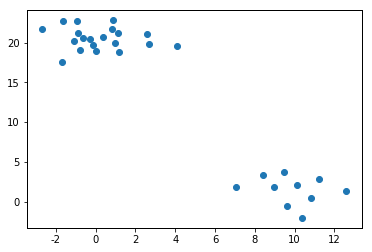

In [9]:
np.random.seed(1234)
x = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[10,])
y = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[20,])
X = np.concatenate((x, y),)
print(X.shape)  # 30 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

In [10]:
# generate the linkage matrix
Z = linkage(X, 'ward')
print(Z)

[[18.         20.          0.39022589  2.        ]
 [17.         24.          0.57031898  2.        ]
 [13.         25.          0.67428479  2.        ]
 [15.         23.          0.74653295  2.        ]
 [10.         30.          0.84116018  3.        ]
 [27.         33.          0.90344738  3.        ]
 [11.         28.          0.9722796   2.        ]
 [22.         34.          0.9741303   4.        ]
 [ 6.          9.          1.07739887  2.        ]
 [ 0.          3.          1.19499958  2.        ]
 [16.         29.          1.29112168  2.        ]
 [12.         31.          1.56138856  3.        ]
 [ 2.          7.          1.59865448  2.        ]
 [14.         36.          1.8214404   3.        ]
 [ 5.          8.          1.93311962  2.        ]
 [19.         40.          1.95364419  3.        ]
 [21.         32.          1.95852884  3.        ]
 [35.         43.          2.16912882  6.        ]
 [ 1.         39.          2.1844205   3.        ]
 [38.         48.          2.65

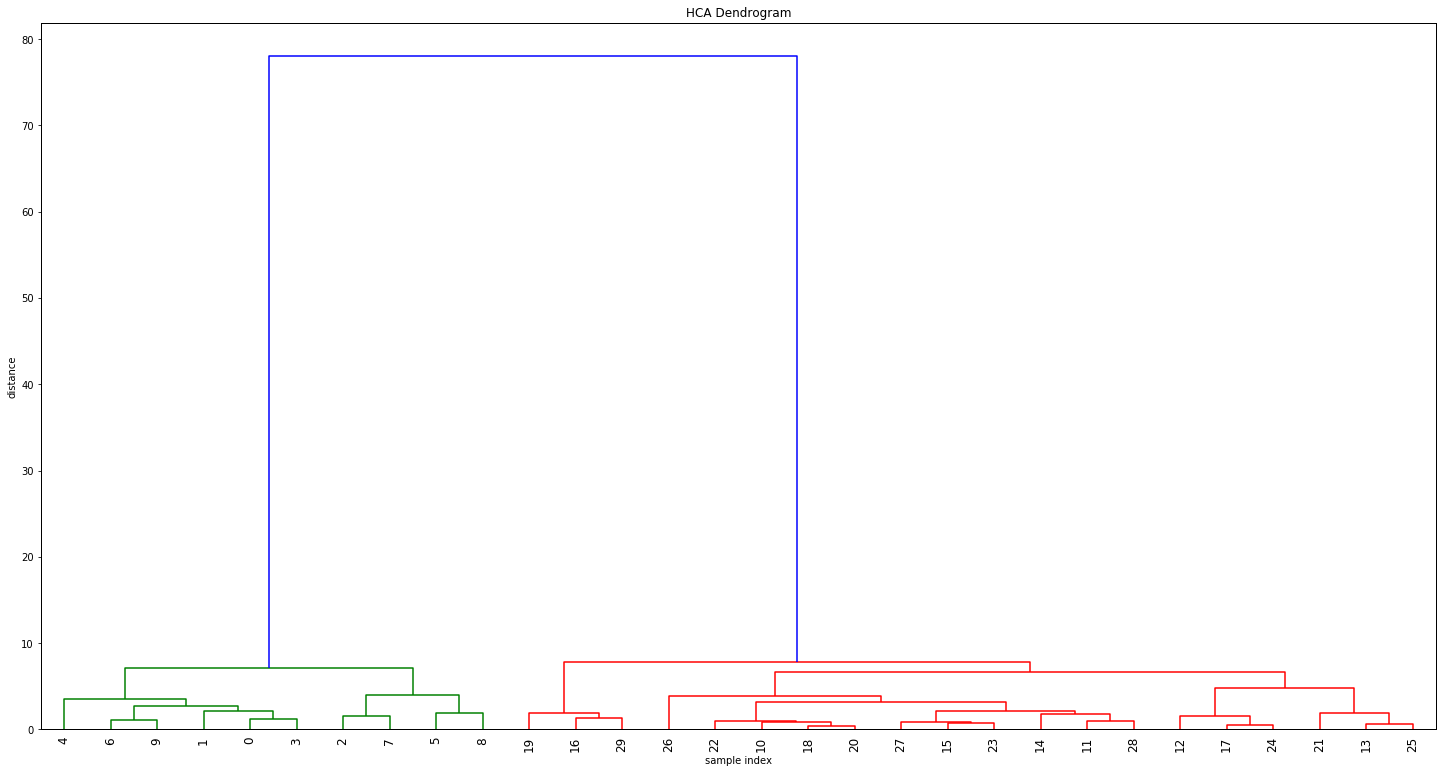

In [13]:
plt.figure(figsize=(25, 13))
plt.title('HCA Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,leaf_rotation=90,leaf_font_size=12,)
plt.show()

In [19]:
labels = [fname.split("_")[3] for fname in fnames]

(96, 1000)


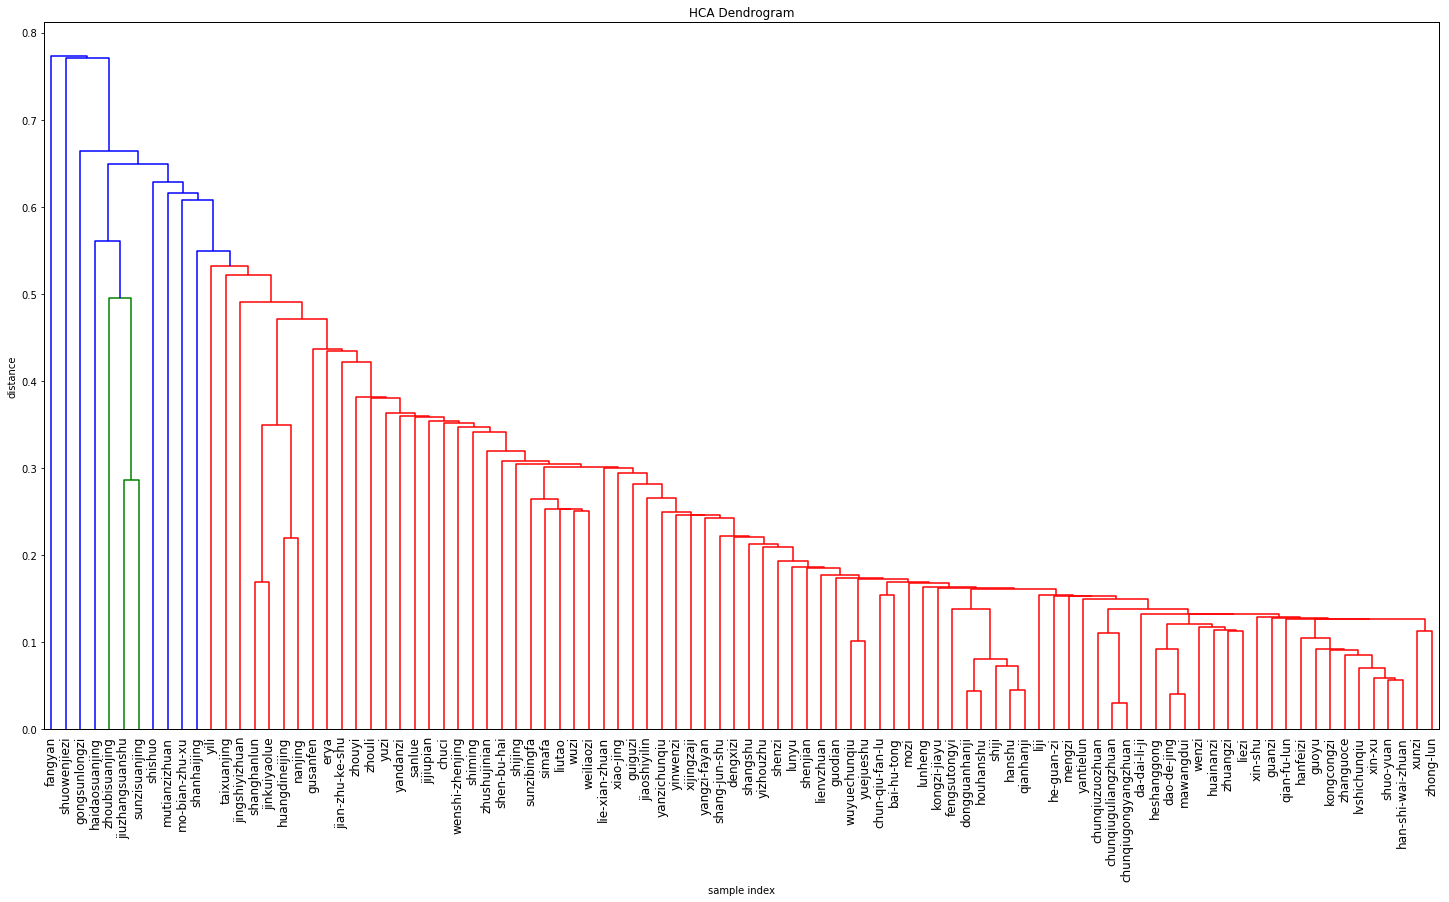

In [24]:
X = vec_mdl
print(X.shape)
# generate the linkage matrix
Z = linkage(X, metric="cosine")
Splt.figure(figsize=(25, 13))
plt.title('HCA Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,leaf_rotation=90,leaf_font_size=12,labels=labels)
plt.show()